# **Dataset**

In [47]:
import pandas as pd #import the pandas library to read-write csv file
df= pd.read_csv('flightTicket.csv') #here i load my dataset
df.head() #showing top 5 rows from dataset

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [48]:
df.info() #it provide all column information in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [49]:
df.shape # it return number of row and column from the dataset

(300153, 12)

In [50]:
df = df.drop(columns=['Unnamed: 0','flight']) # I think that these 2 columns are not important to predict price so i removed this 2

# **Null Value Checking**

In [51]:
df.isnull().sum() #checking if null value exist or not

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0
price,0


# **Duplicate Value Checking**

In [52]:
df.duplicated().sum() # checking duplicacy in dataset

2213

# **Categorical Value Unique data checking**

In [53]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())
    print("***"*10)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
******************************
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
******************************
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
******************************
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
******************************
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
******************************
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata    

In [54]:
df.describe(include = 'object')

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153
unique,6,6,6,3,6,6,2
top,Vistara,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,61343,71146,250863,91538,59097,206666


# **Data Visualization**

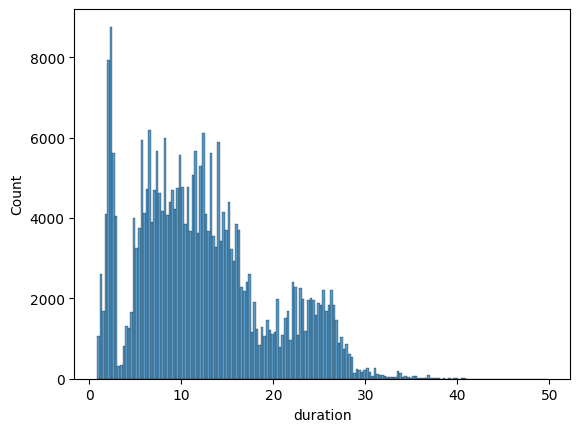

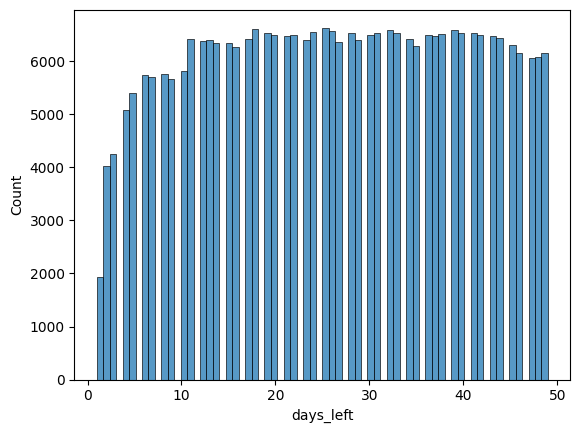

In [55]:
#it will return feature information of continuous numeric data
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.select_dtypes(include='number'):
    if i != 'price':
        sns.histplot(data = df, x=i)
        plt.show()

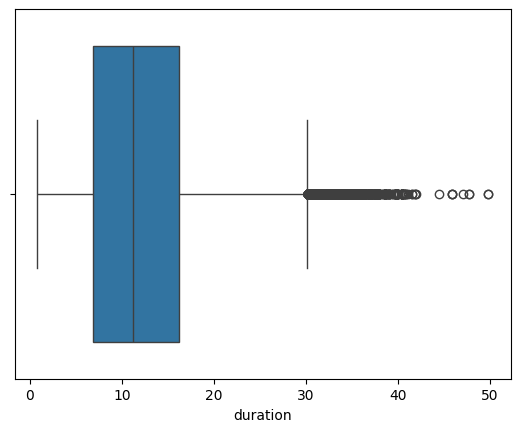

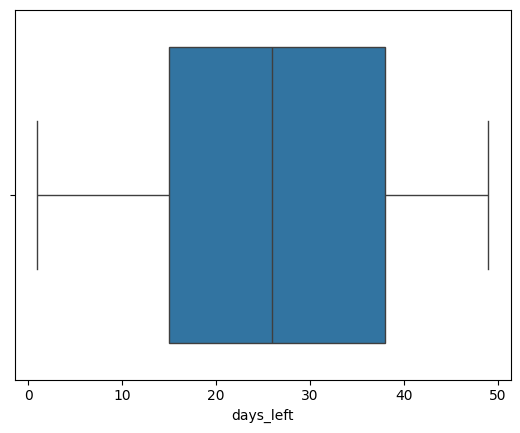

In [56]:
#checking overlier treatment applicable or not
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.select_dtypes(include='number'):
    if i != 'price':
        sns.boxplot(data = df, x=i)
        plt.show()

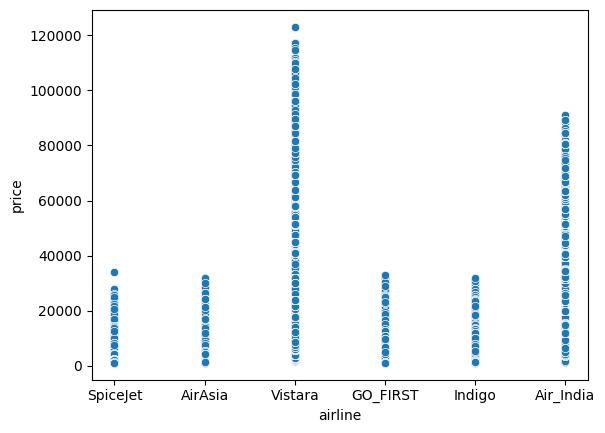

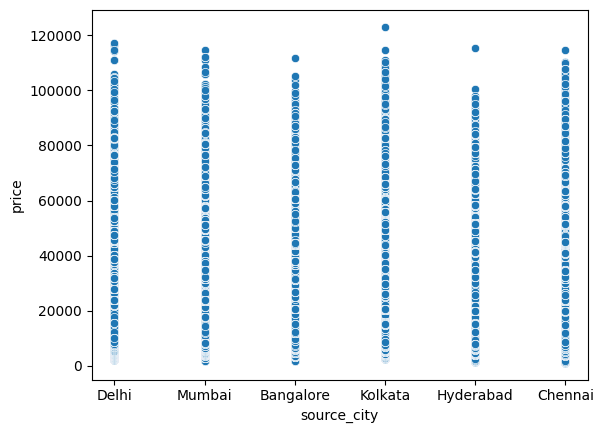

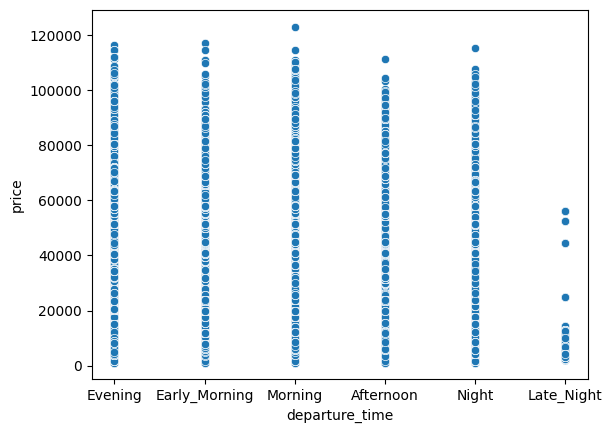

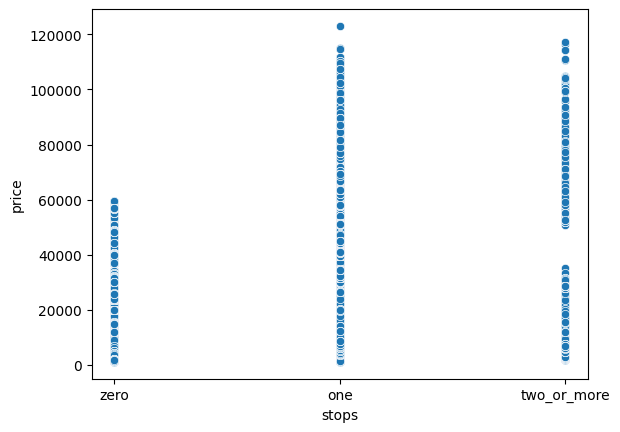

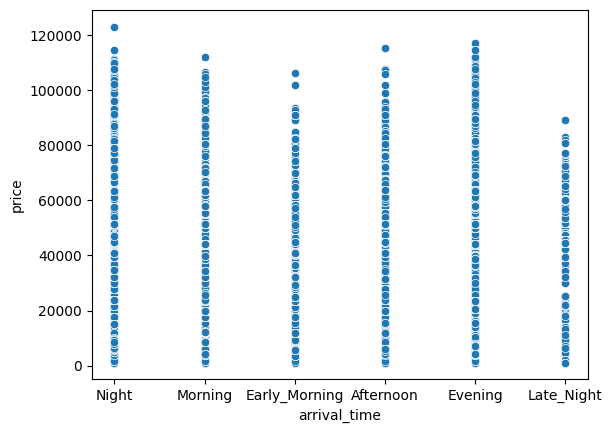

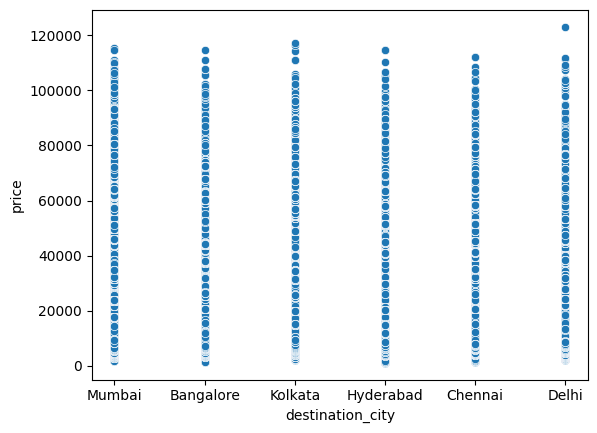

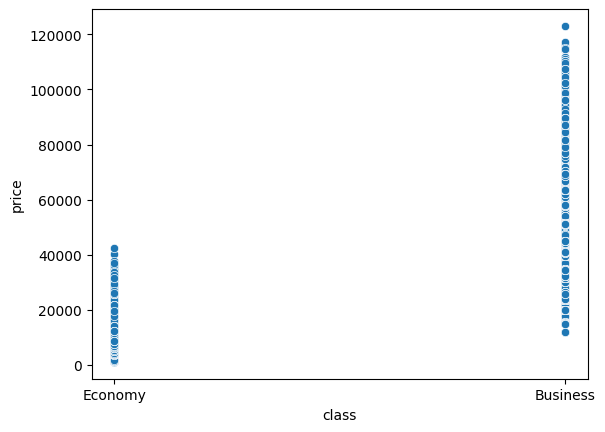

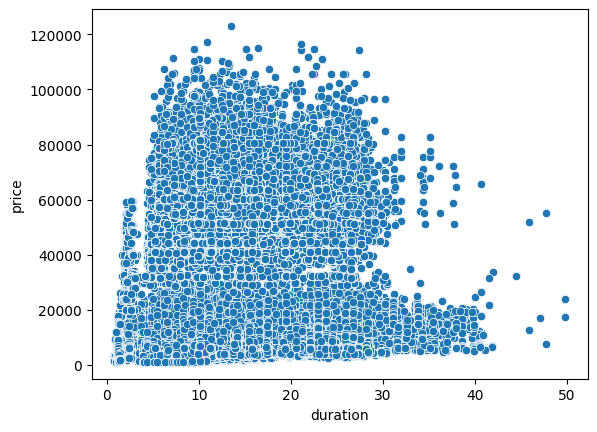

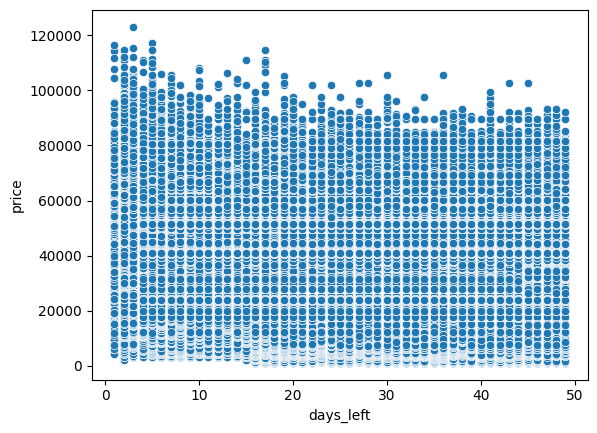

In [57]:
#checking relation with target data
for i in list(df.columns):
    if i!='price':
      sns.scatterplot(data=df, x=i, y='price')
      plt.show()

# **Converting Categorical Data to Numeric using Label Encoding**

In [58]:
from sklearn.preprocessing import LabelEncoder #importing labelEncoder library
encoder = LabelEncoder()
for i in ["airline","source_city","departure_time", "stops", "arrival_time", "destination_city", "class"]:
    df[i] = encoder.fit_transform(df[i])

In [59]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


# **Model Implementation**

In [60]:
X = df.drop(columns=['price']) #except target column others one i want to store in X variable
Y = df['price'] # target column

In [61]:
from sklearn.model_selection import train_test_split # for splitting train-test i need to import this library
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #split the dataset in 80% and 20% for training and testing

In [62]:
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Decision Tree Regressor
def decision_tree_regressor(X_train, Y_train, X_test, Y_test):
    dt_model = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=42)
    dt_model.fit(X_train, Y_train)
    dt_prediction = dt_model.predict(X_test)
    mse = mean_squared_error(Y_test, dt_prediction)
    r2 = r2_score(Y_test, dt_prediction)

    return dt_model, mse, r2, dt_prediction

# Random Forest Regressor
def random_forest_regressor(X_train, Y_train, X_test, Y_test):
    model = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42)
    model.fit(X_train, Y_train)
    rf_prediction = model.predict(X_test)
    mse = mean_squared_error(Y_test, rf_prediction)
    r2 = r2_score(Y_test, rf_prediction)
    return model, mse, r2,rf_prediction

# Output: Return model, Mean Squared Error (MSE), Prediction and R-squared (R2), and MAPE for each model



In [63]:
import numpy as np
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) * 100 / y_true))

In [64]:
dt_model, mse, r2, dt_prediction = decision_tree_regressor(X_train, Y_train, X_test, Y_test)
dt_mape = MAPE(Y_test, dt_prediction)
print(f"decision_tree_regressor MSE: {mse}, R2: {r2}, MPE: {dt_mape}")
model, mse, r2,rf_prediction = random_forest_regressor(X_train, Y_train, X_test, Y_test)
rf_mape = MAPE(Y_test, rf_prediction)
print(f"random_forest_regressor MSE: {mse}, R2: {r2}, MPE: {rf_mape}")

decision_tree_regressor MSE: 12531654.33546973, R2: 0.9756894563052412, MPE: 7.390061505193115
random_forest_regressor MSE: 7764563.913352611, R2: 0.9849372824023692, MPE: 7.0379147341037145


# **Testing**

In [65]:
comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted (Random Forest)': rf_prediction, 'Predicted (Decision Tree)': dt_prediction})
comparison_df.head(10)  # Compare the first 10 values

,Actual,Predicted (Random Forest),Predicted (Decision Tree)
27131,7366,6483.54,7366.0
266857,64831,71088.36,72783.0
141228,6195,6195.00,6195.0
288329,60160,60322.97,60160.0
97334,6578,6459.02,6578.0
135931,4555,7351.58,8059.0
290630,23838,23838.00,23838.0
141944,3860,3881.30,3860.0
244517,32230,49749.92,51117.0
215903,76841,65860.56,69449.0


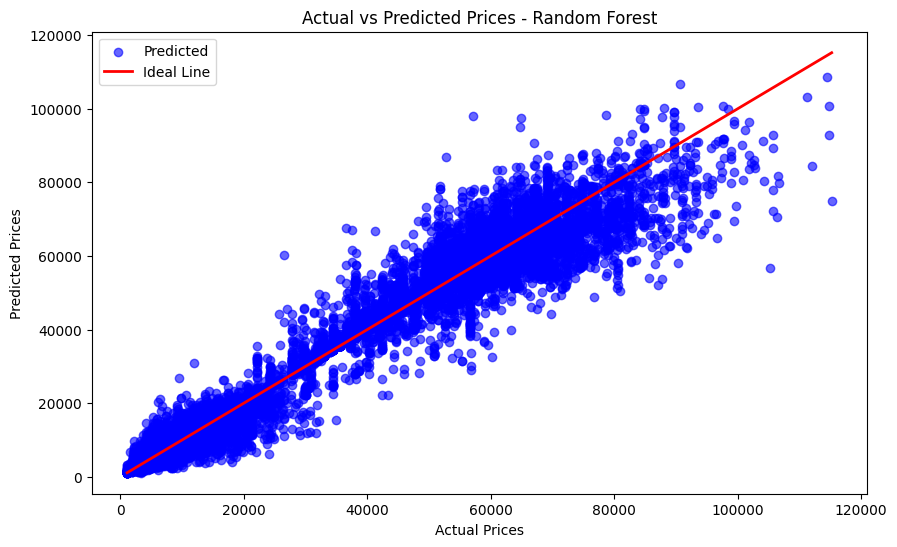

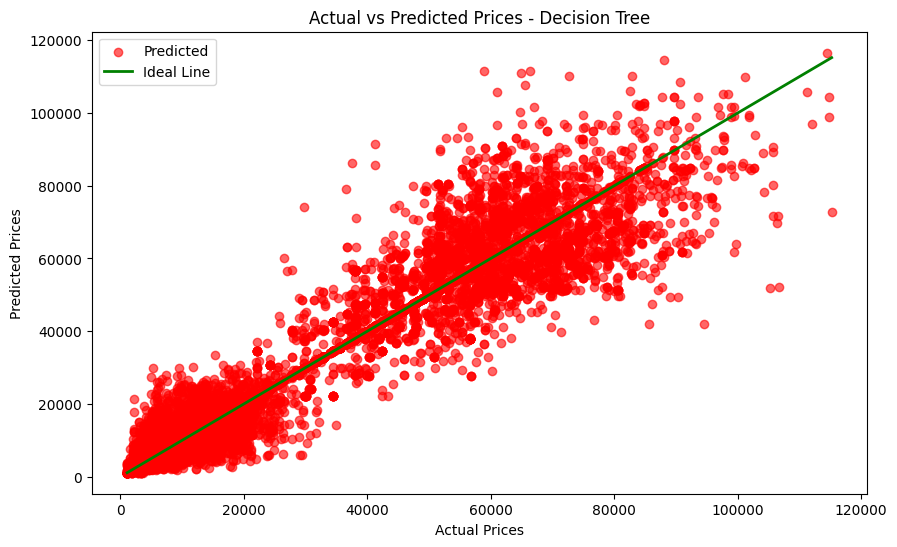

In [66]:
# Plotting individual scatter plots for Random Forest and Decision Tree predictions

# Scatter plot for Actual vs Predicted (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted (Random Forest)'], color='blue', alpha=0.6, label='Predicted')
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', lw=2, label='Ideal Line')  # Ideal line where predicted = actual
plt.title('Actual vs Predicted Prices - Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Scatter plot for Actual vs Predicted (Decision Tree)
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted (Decision Tree)'], color='red', alpha=0.6, label='Predicted')
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='green', lw=2, label='Ideal Line')  # Ideal line where predicted = actual
plt.title('Actual vs Predicted Prices - Decision Tree')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
